In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from qlearning import QLearningAgent
from IPython.display import clear_output

env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s" % (env.reset()))
plt.imshow(env.render('rgb_array'))
env.close()

first state:[-0.0483685  -0.01999304  0.00172665  0.00985584]


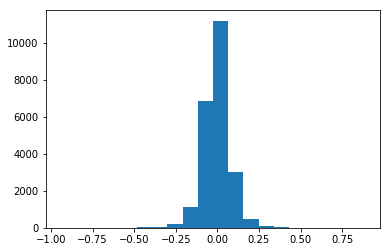

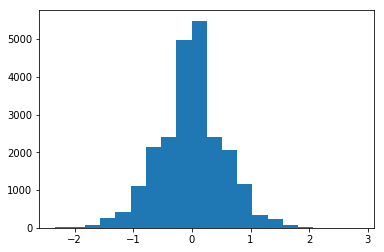

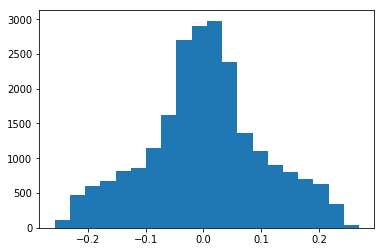

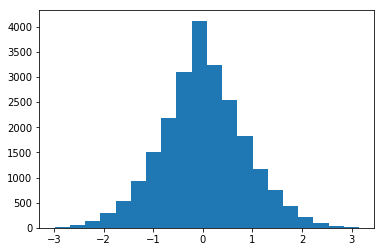

In [2]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

In [3]:
from gym.core import ObservationWrapper


class Binarizer(ObservationWrapper):
    
    def observation(self, state):
        
        # state = <round state to some amount digits.>
        # hint: you can do that with round(x,n_digits)
        # you will need to pick a different n_digits for each dimension
        state = np.round(state, 1)
                
        
        return tuple(state)

In [4]:
env = Binarizer(gym.make("CartPole-v0"))

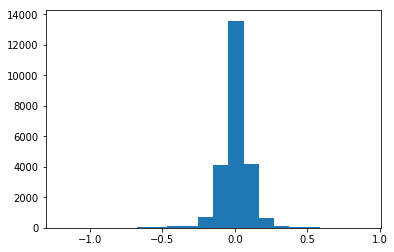

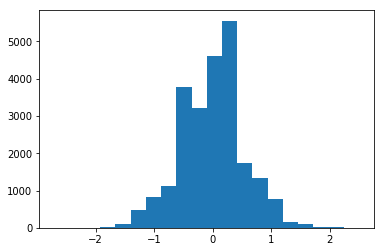

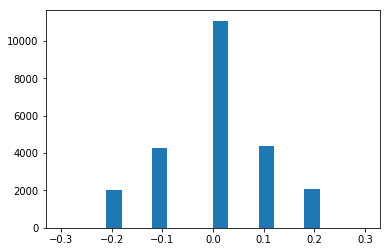

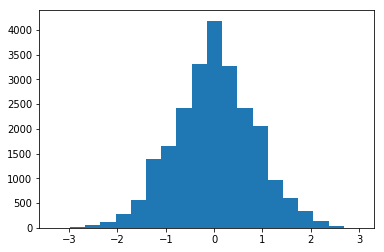

In [5]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):

    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

In [6]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

def play_and_train(env, agent, t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)

        # train (update) agent for state s
        agent.update(s, a, r, next_s)

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

eps = 0.25 mean reward = 71.4


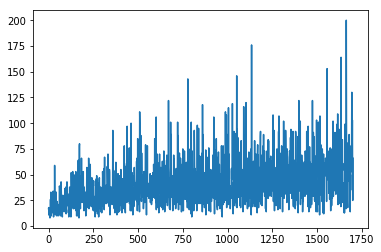

In [7]:
rewards = []
for i in range(1800):
    rewards.append(play_and_train(env, agent))

    # OPTIONAL YOUR CODE: adjust epsilon
    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()

In [8]:
print(len(agent._qvalues))

4103
